(0.5, 9.649999999999999) (1, 9.350000000000001)
(1, 8.649999999999999) (4, 8.350000000000001)
(7.5, 9.649999999999999) (4, 8.350000000000001)
(4, 7.65) (4, 7.3)
(4, 3.7) (4, 3.3)
(4, -0.3) (4, -0.6499999999999999)


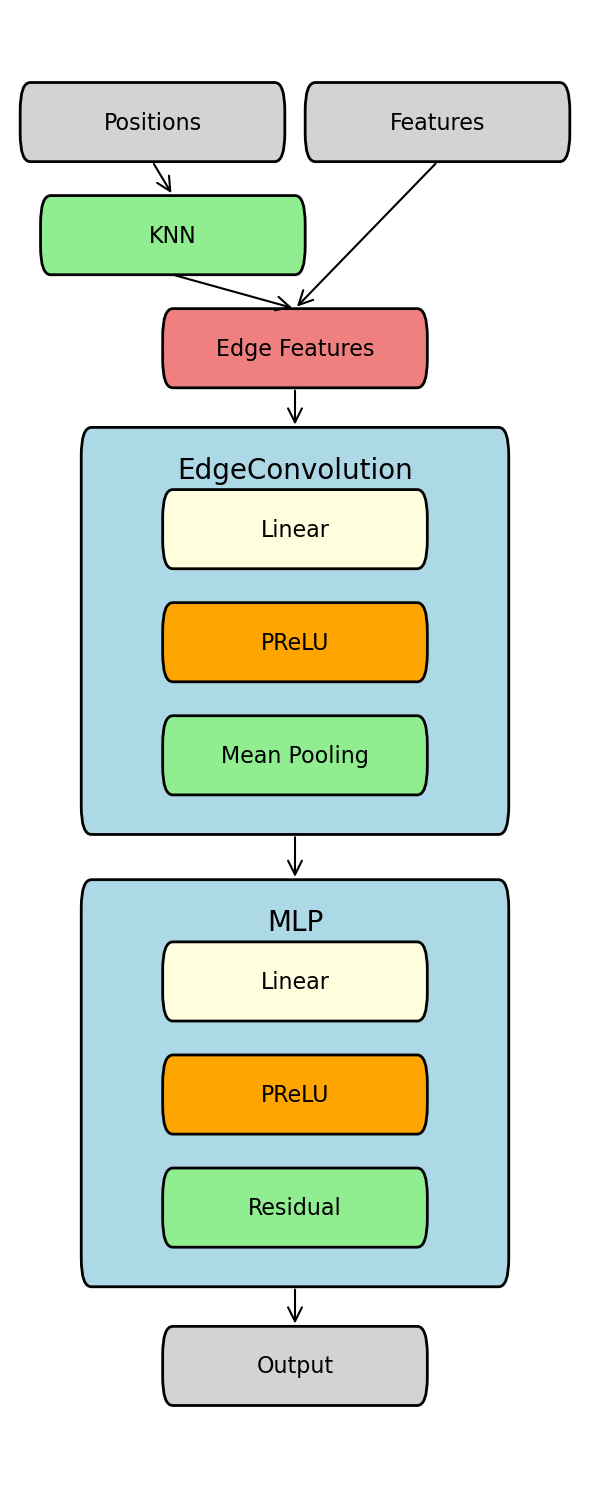

In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch,FancyArrowPatch
plot_dir = "/home/llr/ilc/shi/code/Energy-Reco/Figures"

def add_centered_box(ax, cx, cy, width, height, text='', facecolor='lightblue',
                     edgecolor='black', fontsize=12, text_position='center', box_pad=0.25,pad=0.,text_rotation=0):
    """
    在给定 Axes 上添加一个以 (cx, cy) 为中心的矩形框。
    
    参数：
        ax: matplotlib.axes.Axes 对象
        cx, cy: 中心坐标
        width, height: 矩形宽高
        text: 框内文本
        facecolor: 填充颜色
        edgecolor: 边框颜色
        fontsize: 文本大小
        text_position: 'center' 或 'top'
        pad: 文本与顶边的垂直距离（只在 text_position='top' 时有效）
    """
    # 计算左下角坐标
    x = cx - width/2
    y = cy - height/2
    
    # 创建矩形框
    box = FancyBboxPatch((x, y), width, height,
                         boxstyle="round,pad={box_pad}".format(box_pad=box_pad),
                         facecolor=facecolor,
                         edgecolor=edgecolor,
                         linewidth=2)
    ax.add_patch(box)
    
    # 文本位置
    if text_position == 'center':
        tx, ty = cx, cy
        va = 'center'
    elif text_position == 'top':
        tx, ty = cx, y + height - pad
        va = 'top'
    else:
        raise ValueError("text_position must be 'center' or 'top'")
    
    ax.text(tx, ty, text, ha='center', va=va, fontsize=fontsize, rotation=text_rotation)
    return box
def draw_edge_arrow(ax, start_box, end_box, direction='vertical', box_pad=0.4):
    """
    从 start_box 的边缘指向 end_box 的边缘。
    
    参数:
        ax: matplotlib.axes.Axes
        start_box, end_box: (cx, cy, w, h)
        direction: 'vertical' 或 'horizontal'，控制箭头从哪边出来
    """
    cx_s, cy_s, w_s, h_s = start_box
    cx_e, cy_e, w_e, h_e = end_box
    space = 0.05  # 箭头与框之间的间距
    if direction == 'vertical':
        # 箭头从 start_box 底部边缘到 end_box 顶部边缘
        start = (cx_s, cy_s - (h_s+box_pad)/2-space)
        end = (cx_e, cy_e + (h_e+box_pad)/2+space)
        print(start,end)
    elif direction == 'horizontal':
        # 箭头从 start_box 右边缘到 end_box 左边缘
        start = (cx_s + (w_s+box_pad)/2 + space, cy_s)
        end = (cx_e - (w_e+box_pad)/2 - space, cy_e)
    else:
        raise ValueError("direction must be 'vertical' or 'horizontal'")
    
    arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=25, lw=1.5, color='black')
    ax.add_patch(arrow)



fig, ax = plt.subplots(figsize=(6, 15))
boxes = {}
big_box = [10, 3.1,20]#x,y,textsize
small_box = [6, 0.2,16]

# 定义所有框的参数
box_specs = [
    # 顶部输入
    (0.5, 10, small_box[0], small_box[1], small_box[2], 'Positions', 'lightgrey', 'center'),
    (7.5, 10, small_box[0], small_box[1], small_box[2], 'Features', 'lightgrey', 'center'),
    # KNN/Edge Features
    (1, 9, small_box[0], small_box[1], small_box[2], 'KNN', 'lightgreen', 'center'),
    (4, 8, small_box[0], small_box[1], small_box[2], 'Edge Features', 'lightcoral', 'center'),
    # EdgeConv
    (4, 5.5, big_box[0], big_box[1], big_box[2], 'EdgeConvolution', 'lightblue', 'top'),
    (4, 6.4, small_box[0], small_box[1], small_box[2], 'Linear', 'lightyellow', 'center'),
    (4, 5.4, small_box[0], small_box[1], small_box[2], 'PReLU', 'orange', 'center'),
    (4, 4.4, small_box[0], small_box[1], small_box[2], 'Mean Pooling', 'lightgreen', 'center'),
    # MLP
    (4, 1.5, big_box[0], big_box[1], big_box[2], 'MLP', 'lightblue', 'top'),
    (4, 2.4, small_box[0], small_box[1], small_box[2], 'Linear', 'lightyellow', 'center'),
    (4, 1.4, small_box[0], small_box[1], small_box[2], 'PReLU', 'orange', 'center'),
    (4, 0.4, small_box[0], small_box[1], small_box[2], 'Residual', 'lightgreen', 'center'),
    # Output
    (4, -1, small_box[0], small_box[1], small_box[2], 'Output', 'lightgrey', 'center')
]
arrows = [
    ('Positions', 'KNN'),
    ('KNN', 'Edge Features'),
    ('Features', 'Edge Features'),
    ('Edge Features', 'EdgeConvolution'),
    ('EdgeConvolution', 'MLP'),
    ('MLP', 'Output')
]

# 循环生成所有框
for spec in box_specs:
    cx, cy, w, h, text_size,text, color, text_pos = spec
    box = add_centered_box(ax, cx, cy, w, h, text=text, facecolor=color, edgecolor='black', fontsize=text_size, text_position=text_pos)
    boxes[text] = (cx, cy, w, h)
for start_text, end_text in arrows:
    draw_edge_arrow(ax, boxes[start_text], boxes[end_text])
ax.set_xlim(-3, 11)
ax.set_ylim(-2, 11)
ax.axis('off')
plt.tight_layout()
plt.savefig(f"{plot_dir}/DGCNN_architecture.pdf", dpi=300, bbox_inches='tight')
plt.show()


(9.5, 6.15) (9.5, 5.25)


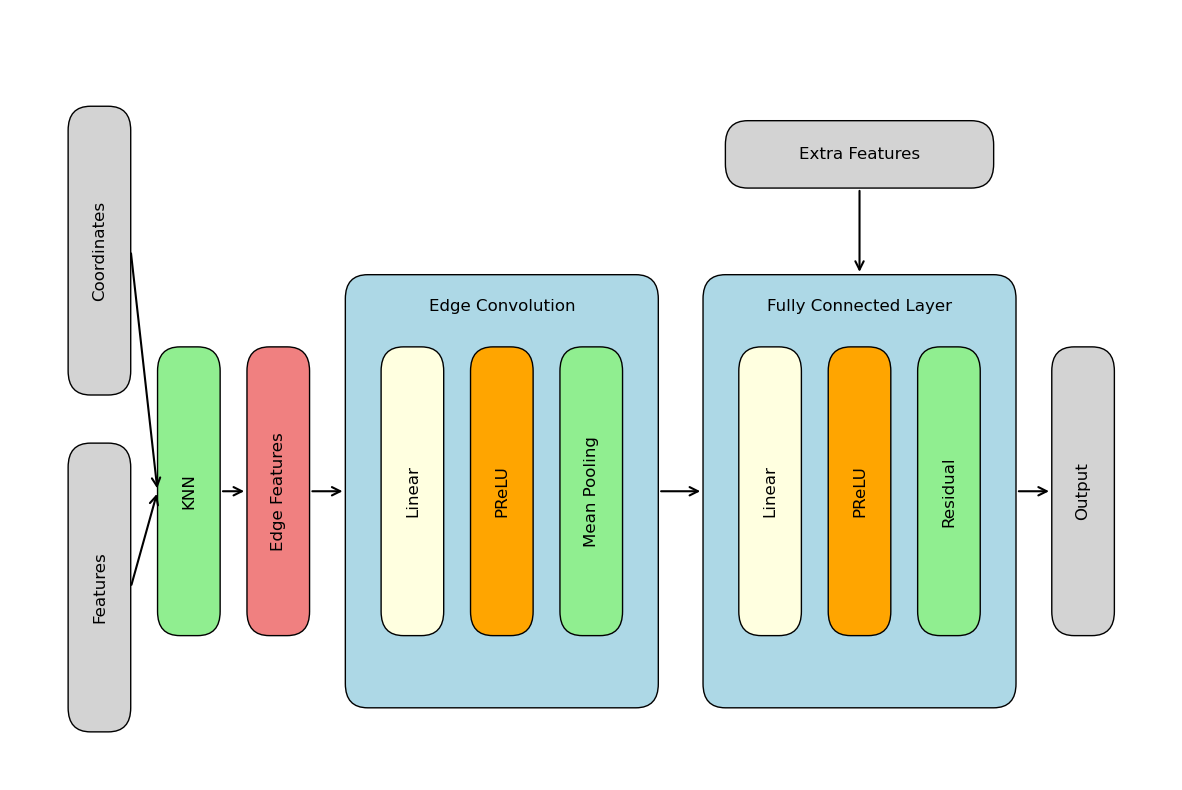

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

boxes = {}
big_box = [3, 4]
small_box = [0.2, 2.5]

# 横向布局：x 从左到右增加
y_main = 3
y_sub = 5

inner_dx = [-1.0, 0.0, 1.0]   # 三个小框横向排列

box_specs = [
    # 输入层
    (1,  y_main+2.5, small_box[0], small_box[1], 'Coordinates', 'lightgrey', 'center',90),
    (1,  y_main-1., small_box[0], small_box[1], 'Features', 'lightgrey', 'center',90),

    # KNN / Edge Features
    (2,  y_main, small_box[0], small_box[1], 'KNN', 'lightgreen', 'center',90),
    (3,  y_main, small_box[0], small_box[1], 'Edge Features', 'lightcoral', 'center',90),

    # EdgeConv block big box
    (5.5, y_main, big_box[0], big_box[1], 'Edge Convolution', 'lightblue', 'top',0),
    (5.5 + inner_dx[0], y_main, small_box[0], small_box[1], 'Linear', 'lightyellow', 'center',90),
    (5.5 + inner_dx[1], y_main, small_box[0], small_box[1], 'PReLU', 'orange', 'center',90),
    (5.5 + inner_dx[2], y_main, small_box[0], small_box[1], 'Mean Pooling', 'lightgreen', 'center',90),

    # MLP block big box
    (9.5, y_main, big_box[0], big_box[1], 'Fully Connected Layer', 'lightblue', 'top',0),
    (9.5 + inner_dx[0], y_main, small_box[0], small_box[1], 'Linear', 'lightyellow', 'center',90),
    (9.5 + inner_dx[1], y_main, small_box[0], small_box[1], 'PReLU', 'orange', 'center',90),
    (9.5 + inner_dx[2], y_main, small_box[0], small_box[1], 'Residual', 'lightgreen', 'center',90),

    #extra features
    (9.5, y_main+3.5, small_box[1], small_box[0], 'Extra Features', 'lightgrey', 'center',0),

    # Output
    (12, y_main, small_box[0], small_box[1], 'Output', 'lightgrey', 'center',90),
]


# 横向箭头
arrows = [
    ('Coordinates', 'KNN',"horizontal"),
    ('Features', 'KNN',"horizontal"),
    ('KNN', 'Edge Features',"horizontal"),
    ('Edge Features', 'Edge Convolution',"horizontal"),
    ('Edge Convolution', 'Fully Connected Layer',"horizontal"),
    ('Extra Features', 'Fully Connected Layer',"vertical"),
    ('Fully Connected Layer', 'Output',"horizontal")
]

# 生成框
for spec in box_specs:
    cx, cy, w, h, text, color, text_pos, text_rotation = spec
    box = add_centered_box(ax, cx, cy, w, h,
                           text=text,
                           facecolor=color,
                           edgecolor='black',
                           fontsize=12,
                           text_position=text_pos,
                           text_rotation=text_rotation)
    boxes[text] = (cx, cy, w, h)

# 生成箭头（改为 horizontal）
for start_text, end_text, direction in arrows:
    draw_edge_arrow(ax, boxes[start_text], boxes[end_text], direction=direction)

ax.set_xlim(0, 13)
ax.set_ylim(0, 8)
ax.axis('off')
plt.show()
